<h1><center>
    ECE 438: Digital Signal Processing with Applications<br/>
    Lab 3: Frequency Analysis<br/>
    <small>Date:</small><br/>
    <small>Section:</small><br>
</center></h1>

|Name |Signature |Time spent outside lab|
|:---:|:---:|:---:|
|Student Name #1 [---%]| | |
|Student Name #2 [---%]| | |

||Below expectations| Lacks in some respect|Meets all expectations|
|:---:|:---:|:---:|:---:|
|**Completeness of the report**||||
|**Organization of the report**||||
|**Quality of figures**: *Correctly labeled with title, x-axis, y-axis, and name(s)*||||
|**Ability to compute Fourier series expansion and synthesize periodic signals using the expansion in Simulink (26 pts)**: *Derivation and sketch, plots of synthesized signals, questions*||||
|**Understanding of modulator and CT system analysis (26 pts)**: *Output plots, questions*||||
|**Implementation of DTFT (21 pts)**: *Python function, DTFT’s magnitude and phase plots*||||
|**DT system analysis (27 pts)**: *Exercises in 5.2, completed block diagram, table of measurements, impulse and frequency response*||||

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# make sure the plot is displayed in this notebook
%matplotlib inline
# specify the size of the plot
plt.rcParams['figure.figsize'] = (16, 6)

# for auto-reloading extenrnal modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<h3 style="color:red;"><left>Exercise 2.1</left></h3>

**1. For each of these two signals, do the following on a blank sheet of paper (or type the equations in the Markdown cell if you are familiar with LaTex):**
* **Compute the Fourier series expansion in the form**
\begin{equation}
    s(t)=a_0+\sum_{k=1}^\infty A_k\sin(2\pi kf_0t+\theta_k)
\end{equation}
where $f_0=\frac{1}{T_0}$.

    **Hint :**You may want to use one of the following references:

    Sec. 4.1 of “Digital Signal Processing”, by Proakis and Manolakis, 1996;

    Sec. 4.2 of “Signals and Systems”, by A. Oppenheim and A. Willsky, 1983;

    Sec. 3.3 of “Signals and Systems”, A. Oppenheim and A. Willsky, 1997.

    Note that in the expression above, the function in the summation is $\sin(2\pi kf_0 t + \theta k )$, rather than a complex sinusoid. The formulas in the above references must be modified to accommodate this. You can compute the cos/sin version of the Fourier series, then convert the coefficients.

$$
s(t) = a_0 + \sum_{k=1}^{\infty} A_k \sin(2 \pi k f_0 t + \theta_k) \\
\text{where } f_0 = \frac{1}{T_0}
$$



**2. Write code to approximate the two signals using the Fourier series expansion above. Use 200 (instead of infinite number of) Sine waves. Then, plot these two signals.**

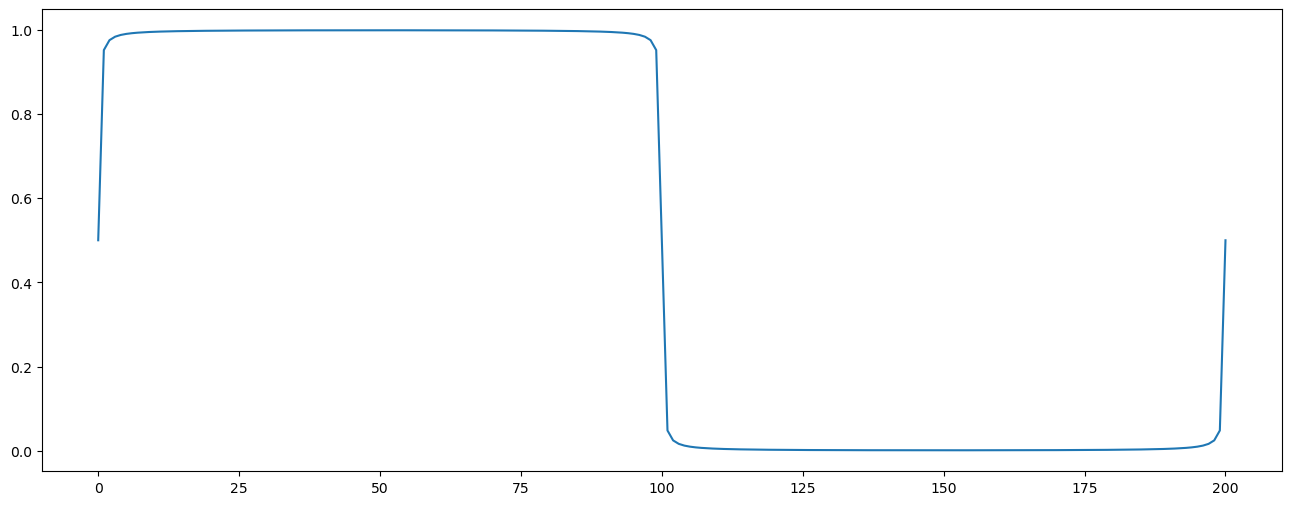

In [13]:
# write your code here
a = np.arange(0, 200)
b = np.linspace(0, 2, 201)
c = 1/2

for ii in range(1, 200, 2):
    c += 2/(ii * np.pi) * np.sin(ii * np.pi * b)
plt.plot(c)
plt.show()


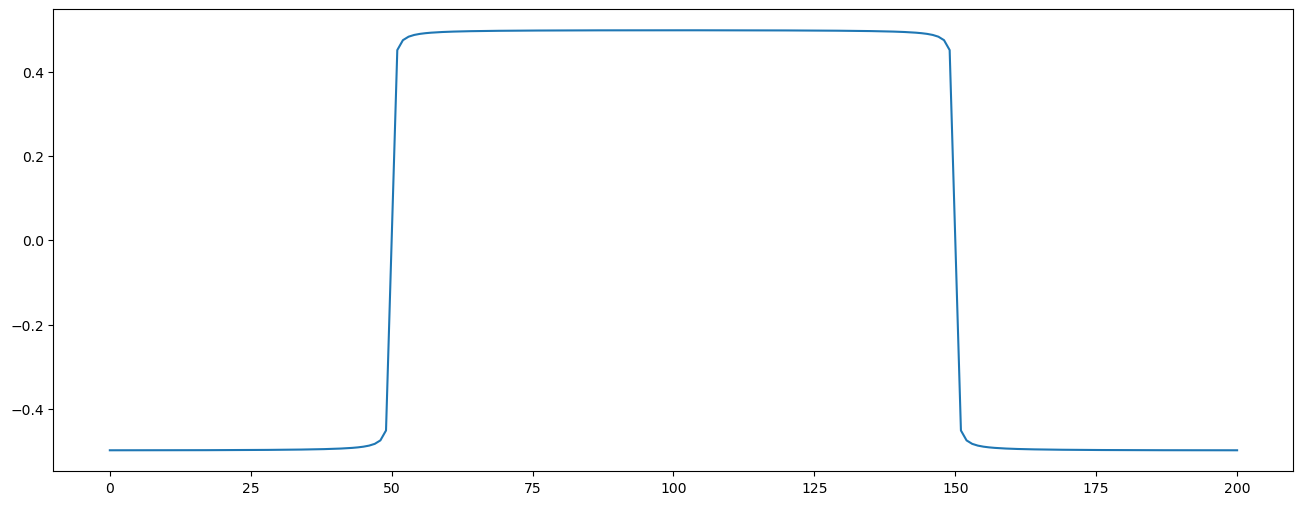

In [14]:
a = np.arange(0, 200)
b = np.linspace(-0.5, 0.5, 201)
c = 0

for ii in range(1, 200, 4):
    c += 2/(ii* np.pi ) * np.sin(2 * ii * np.pi * b + np.pi/2)
for ii in range(3, 200, 4):
    c+= -2/(ii * np.pi) * np.sin(2 * ii * np.pi * b + np.pi/2)
plt.plot(c)
plt.show()

<h3 style="color:red;"><left>Exercise 4.1</left></h3>

**1. Hand in plots of the Spectrum Analyzer output for each of the three synthesized waveforms.** 

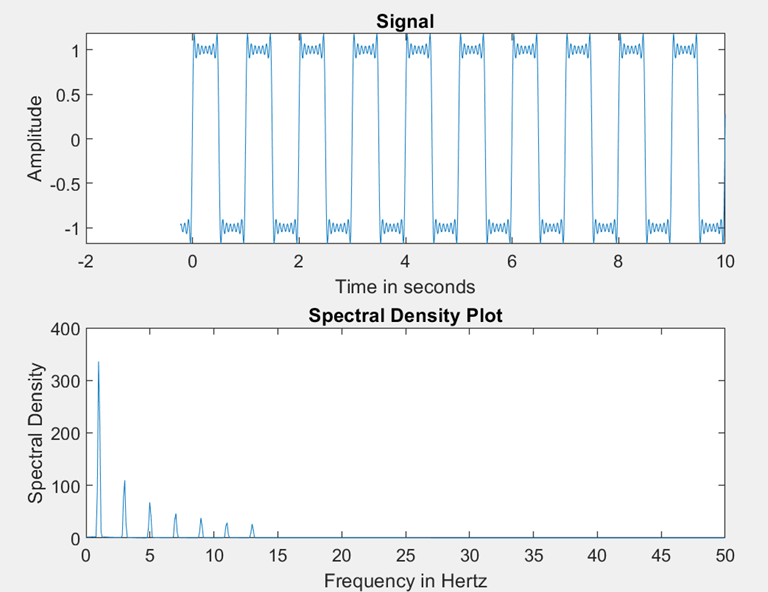
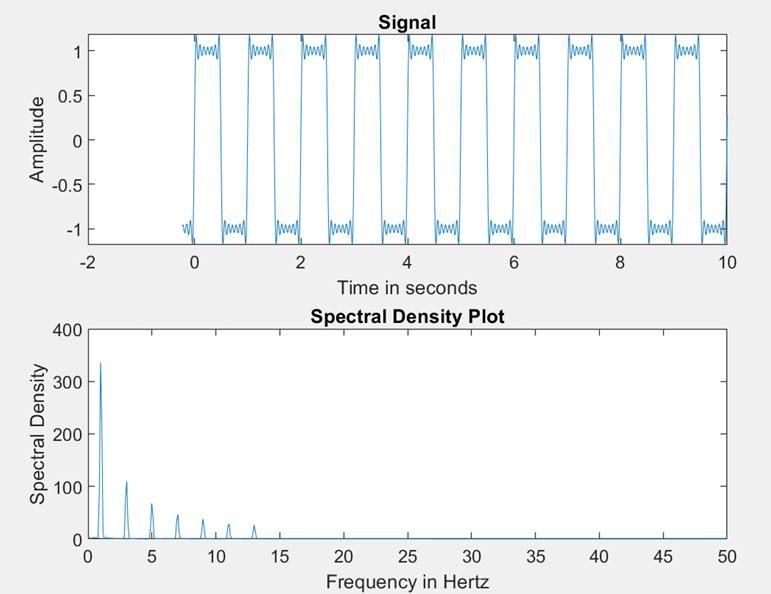
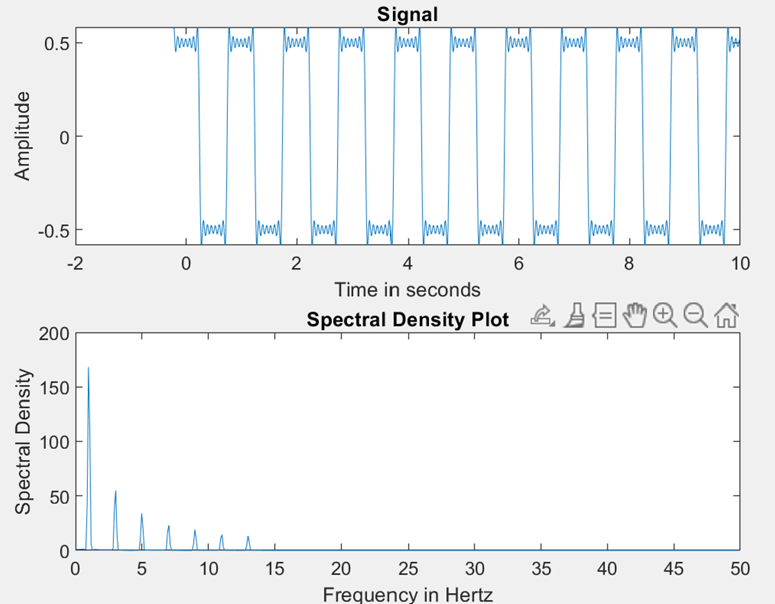


**2. For each case in Q1, comment on how the synthesized waveform differs from the desired signal,and on the structure of the spectral density.**

Case 1 (Top plot): The waveform resembles a square wave, but there may be small distortions in the edges. The spectral density shows several harmonics at regular intervals, which is typical for square waves. However, the additional or unexpected peaks, it indicates noise or harmonic distortion.

Case 2 (Middle plot): This waveform also shows characteristics of a square wave, though the amplitude appears slightly different. The spectral density is dominated by a strong fundamental frequency and fewer harmonics, suggesting this may be a less complex signal than Case 1.

Case 3 (Bottom plot): The waveform appears to have some rounding at the peaks, which may indicate an issue in synthesis (such as filtering or aliasing). The spectral density plot has fewer harmonics and peaks with lower magnitudes, which could imply a smoother waveform compared to the first two cases.

Waveform Differences: The synthesized waveforms differ from an ideal square wave in terms of the sharpness of their transitions and amplitude consistency. Case 1 is the closest to an ideal square wave but has slight artifacts. Case 2 is less sharp and more consistent, while Case 3 shows the smoothest, most rounded waveform with significant attenuation.

Spectral Density Structure: The spectral density plots reflect the differences in waveform sharpness. Case 1 shows the most harmonics, indicative of sharp transitions. Case 2 has fewer harmonics, suggesting some smoothing, while Case 3 has the fewest harmonics, indicating the most smoothed waveform with the least high-frequency content.

<h3 style="color:red;"><left>Exercise 4.2</left></h3>

**1. Hand in plots of the output of the *Spectrum Analyzer* for each signal.**

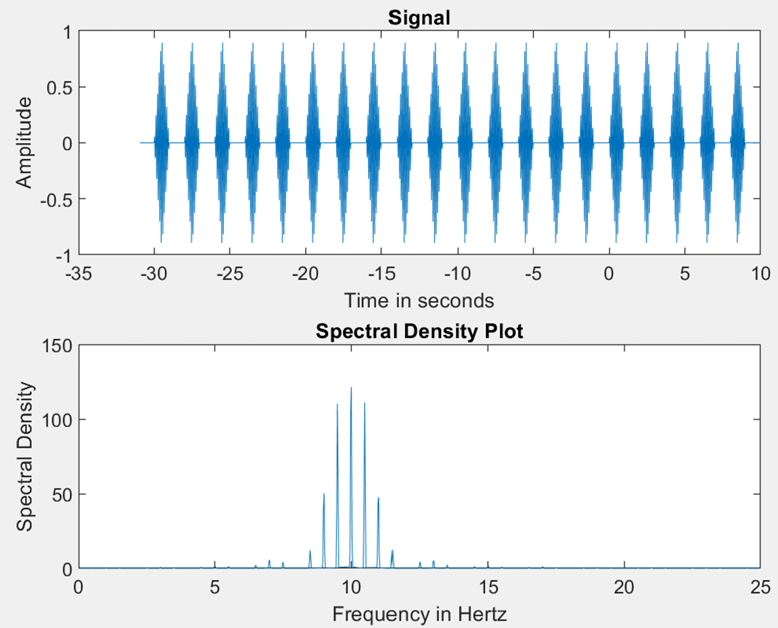
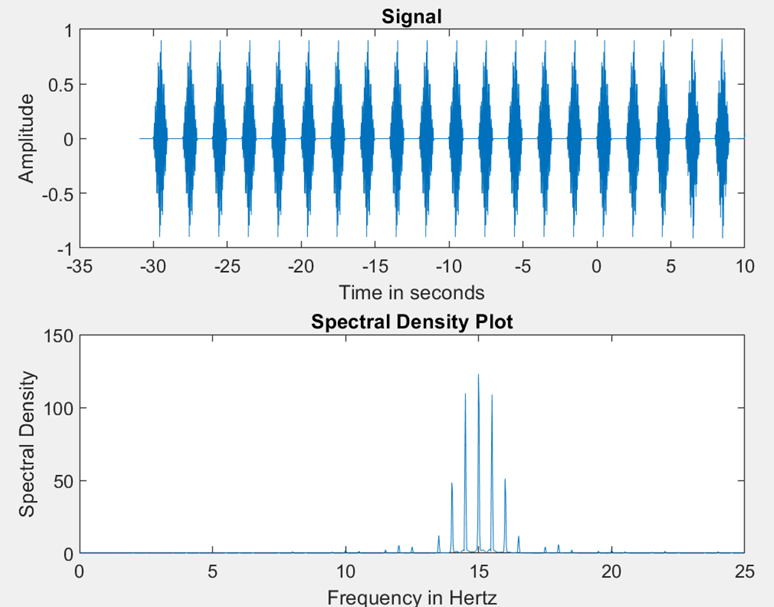
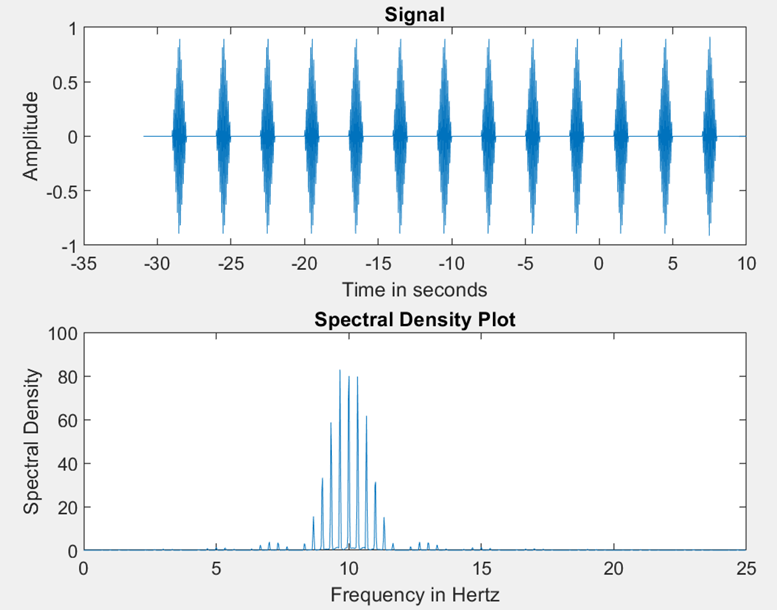
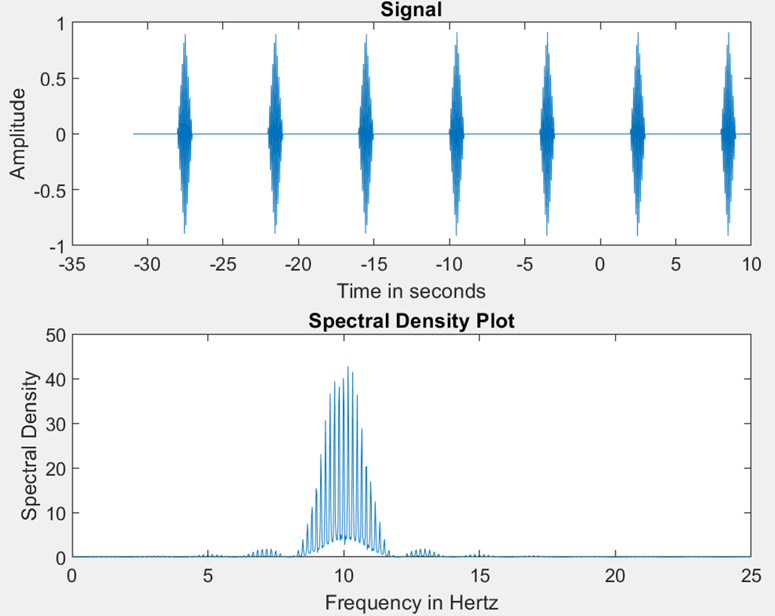

**2. What effect does changing the modulating frequency have on the spectral density?**

Changing the modulating frequency shifts the locations of the spectral peaks in the frequency domain. Specifically, as the modulating frequency increases, the spectral components move to higher frequencies. This is evident in the spectral density plots, where increasing the modulating frequency results in a greater separation between the spectral peaks. The number of harmonics remains, but their spacing changes with the modulating frequency. As the modulating frequency increases, the spacing between the peaks becomes larger, which means that the energy is distributed over a broader range of frequencies.

**3. Why does the spectrum have a comb structure and what is the spectral distance between impulses? Why?**

The comb structure in the spectrum occurs because the time-domain signal is periodic. A periodic signal in the time domain results in discrete spectral components in the frequency domain, leading to this "comb" structure with distinct spikes at harmonic frequencies. The distance between the impulses in the comb corresponds to the fundamental frequency of the periodic signal. The spectral distance between the impulses is given by the fundamental frequency 𝑓_0. The reason for this is based on Fourier theory, where a periodic waveform can be decomposed into a series of harmonics, spaced by 𝑓_0, the fundamental frequency of the waveform.

**4. What would happen to the spectral density if the period of the triangle pulse were to
increase toward infinity? (in the limit)**  

If the period of the triangle pulse increases toward infinity, the signal becomes less periodic and approaches a single, isolated pulse. In the frequency domain, this would lead to a continuous spectrum rather than a discrete set of harmonics. Specifically, the spectral density would become more densely packed, and the distance between the impulses in the spectral density would approach zero. In the limit, the signal would have a continuous spectral density, as the signal would no longer be periodic in time but would instead resemble a single, non-repeating event.

<h3 style="color:red;"><left>Exercise 4.3</left></h3>

**1. Hand in the printout of the output of the Network Analyzer (magnitude and phase of the
frequency response, and the impulse response).**

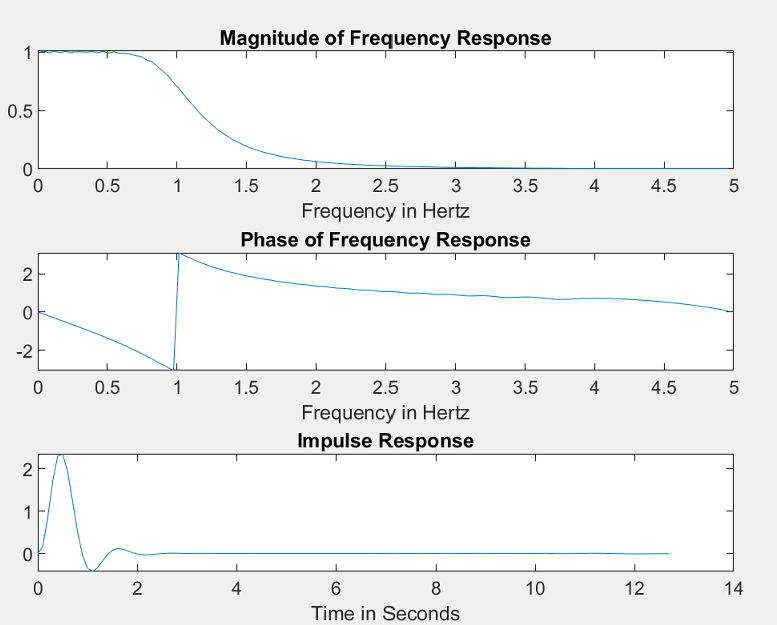

**2. Hand in the plot of the impulse response obtained using a unit step.**

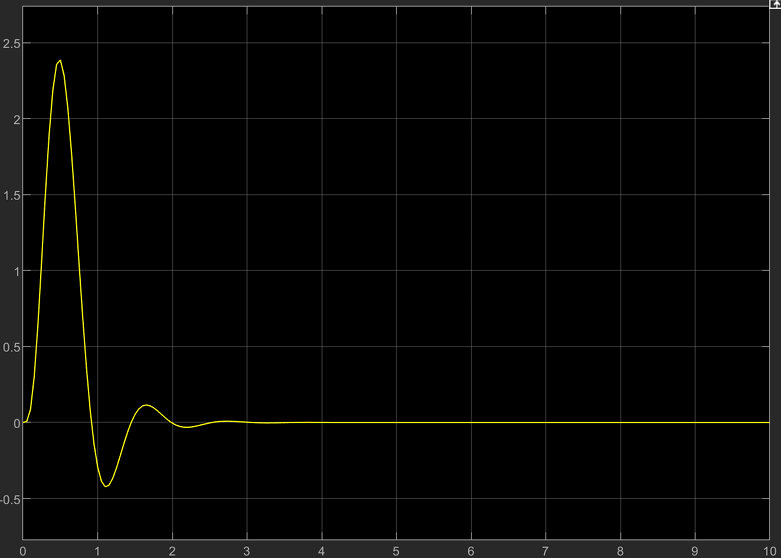

**3. What are the advantages and disadvantages of each method?**

The Network Analyzer method offers distinct advantages, particularly when it comes to understanding a system’s behavior in the frequency domain. By providing both the magnitude and phase of the frequency response, it gives a complete view of how the system reacts to different frequencies, which is critical in applications like filter design and signal processing. This method allows for detailed characterization of bandwidth, resonance, and other frequency-dependent behaviors. Additionally, the frequency response data can be transformed back into the time domain using the inverse Fourier transform, enabling the calculation of the system’s impulse response. The use of a chirp signal in the Network Analyzer ensures that the system is tested across a wide range of frequencies, which provides a comprehensive analysis of the system’s dynamics. However, this approach is more complex, requiring a solid understanding of both time-domain and frequency-domain analysis, and some nuances of the time-domain behavior may not be immediately obvious from the frequency response alone.

In contrast, the Unit Step method is much simpler and more intuitive, especially for those primarily interested in time-domain responses. By applying a unit step input and differentiating the output, you can directly observe the system’s impulse response. This approach provides a clear picture of the system’s behavior over time, including important characteristics such as overshoot, damping, and settling time. The simplicity of this method makes it ideal for analyzing basic time-domain system dynamics without needing to delve into the frequency domain. However, the Unit Step method does not provide the same level of detail about frequency-dependent behavior. It lacks phase information, which can be critical in many signal processing applications, and would require additional steps like the Fourier transform to extract frequency-domain data. Moreover, this method may not provide sufficient insight into the system’s high-frequency behavior, which could be better analyzed using the Network Analyzer.

<h3 style="color:red;"><left>Exercise 5.1</left></h3>

**1. Complete the follwing function that computes the DTFT of a discrete-time signal.** 
```python
def DTFT(x,n0,w):
    """
    This function computes the DTFT of a discrete-time signal.
    
    Parameters
    ---
    x: the discrete-time signal
    n0: time index corresponding to the 1st element of the x vector
    w: frequencies
    
    Returns
    ---
    X: the computed DTFT
    """
    pass
```
**Note that if ```x``` is a vector of length $N$, then its DTFT is computed by**

\begin{equation}
    X(\omega)=\sum_{n=0}^{N-1}x[n]e^{-jw(n+n0)}
\end{equation}

**where $w$ is a vector that contains the frequencies from $-\pi$ to $\pi$.**

**Hint:** In Python, ```1j``` is defined as $\sqrt{-1}$. Use `np.exp(x)` to calculate $e^x$.

In [15]:
# write your code here
def DTFT(x, n0, w):
    n = len(x)
    a = 0
    for ii in range(0, n-1):
        a += x[ii] * np.exp(-(1j * w * (ii + n0)))
    return a

**2. For the following signals** 

* $x[n]=\delta[n]$
* $x[n]=\delta[n-5]$
* $x[n]=(0.5)^nu[n]$

**use your DTFT function to compute $X(\omega)$, and plots its magnitude and phase.**

**Hint**: Use `np.power(a,b)` to calculate $a^b$. Use ```np.abs()``` and ```np.angle()``` to compute the magnitude and phase.

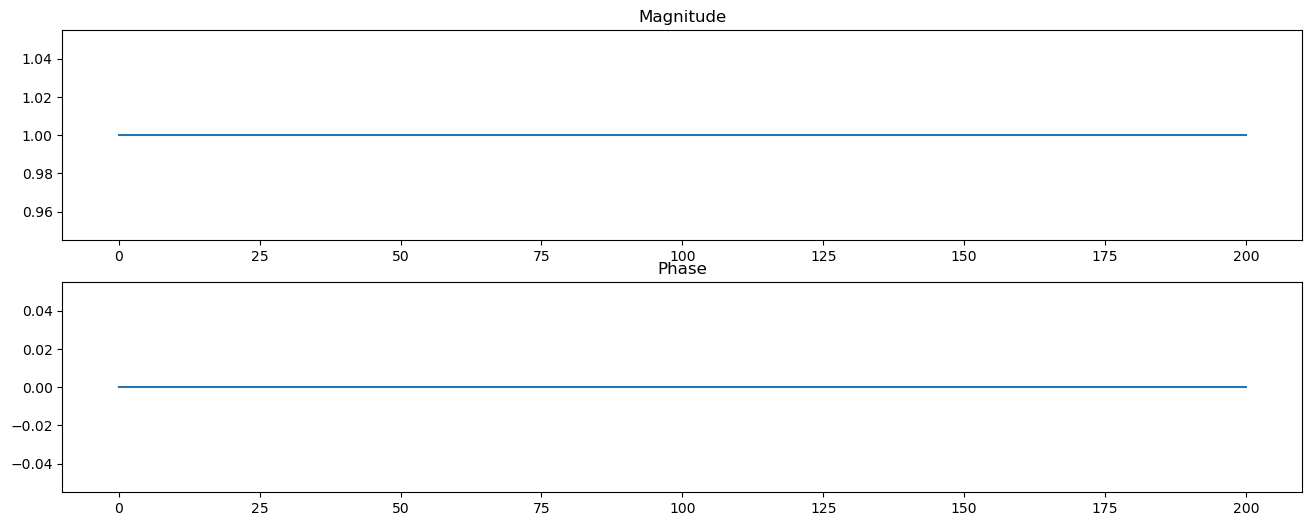

In [16]:
# write your code here

#For x[n] = delta[n]
w = np.linspace(-np.pi, np.pi, 201)
a = [1, 0, 0, 0]
b = DTFT(a, 0, w)
m = np.abs(b)
ang = np.angle(b)
figure, axis = plt.subplots(2, 1)

axis[0].plot(m)
axis[0].set_title("Magnitude")

axis[1].plot(ang)
axis[1].set_title("Phase")
plt.show()


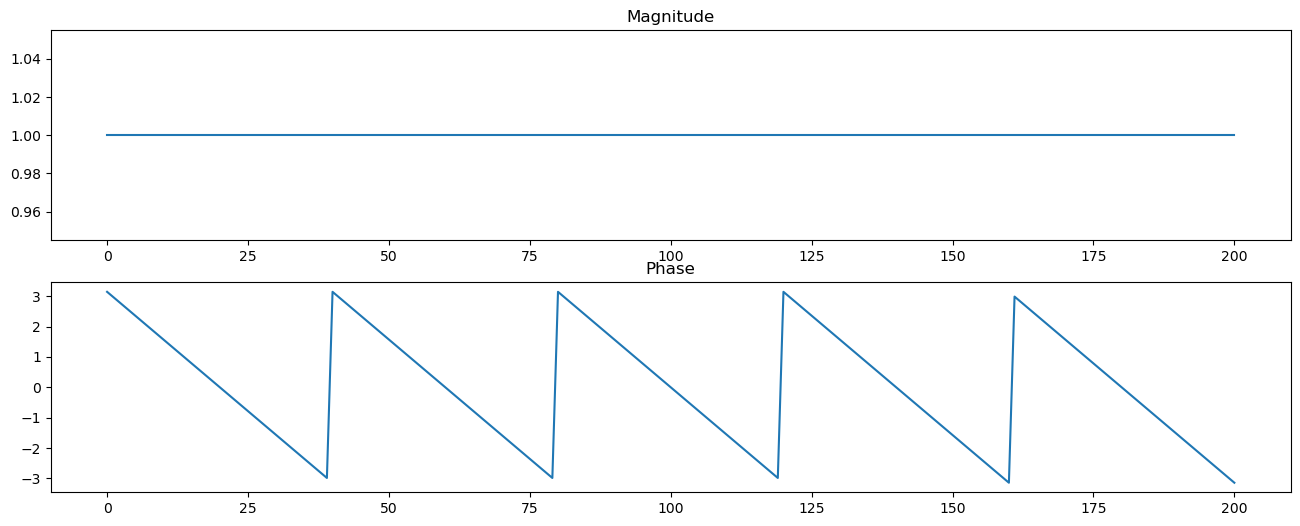

In [17]:
#For x[n] = delta[n - 5]
w = np.linspace(-np.pi, np.pi, 201)
a = [0, 0, 0, 0, 0, 1, 0, 0, 0]
b = DTFT(a, 0, w)
m = np.abs(b)
ang = np.angle(b)
figure, axis = plt.subplots(2, 1)

axis[0].plot(m)
axis[0].set_title("Magnitude")

axis[1].plot(ang)
axis[1].set_title("Phase")
plt.show()

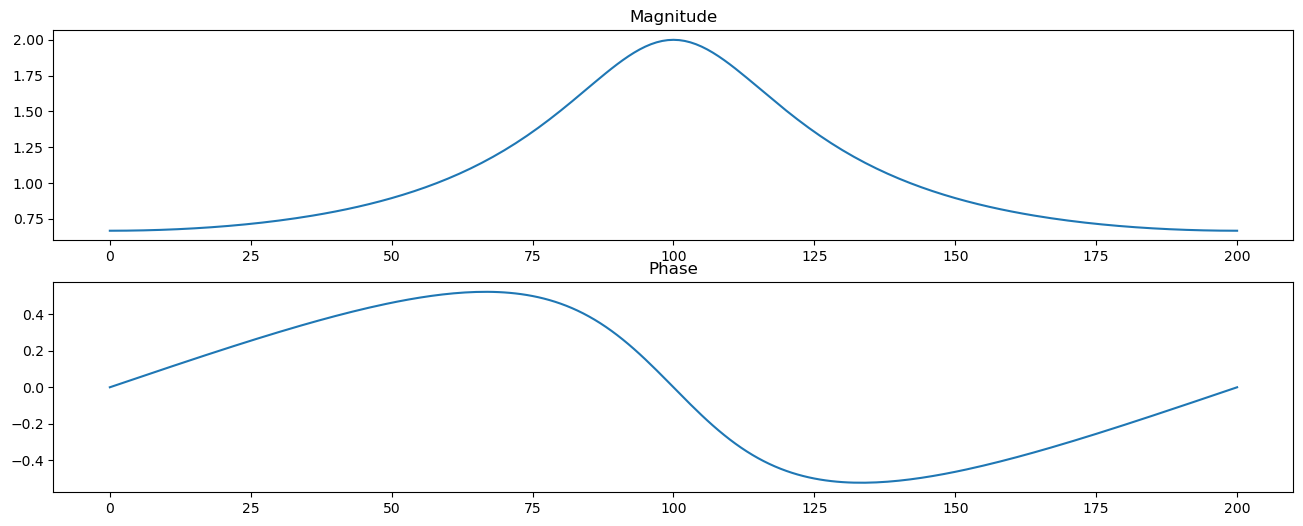

In [18]:
#For x[n] = (0.5)^n * u[n]
w = np.linspace(-np.pi, np.pi, 201)
n = np.linspace(-100, 100, 201)
n0 = n[0]
a = np.power(0.5, n) * (n >= 0).astype(float)
b = DTFT(a, n0, w)
m = np.abs(b)
ang = np.angle(b)
figure, axis = plt.subplots(2, 1)

axis[0].plot(m)
axis[0].set_title("Magnitude")

axis[1].plot(ang)
axis[1].set_title("Phase")
plt.show()

<h3 style="color:red;"><left>Exercise 5.2: Magnitude and Phase of the Frequency Response of a Discrete-Time Systems</left></h3>

Consider the discrete-time system described by the following difference equation:

\begin{equation}y[n]=0.9y[n-1]+0.3x[n]+0.24x[n-1]\end{equation}

Assume that the system is **causal**.

**1. Draw a system diagram.**

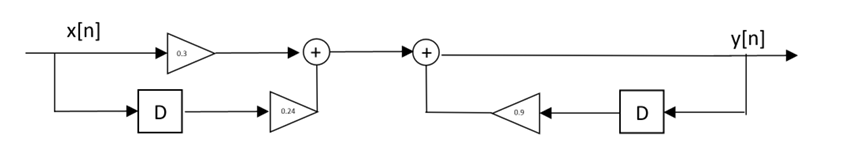

**2. Obtain the impulse response of the system by replacing $x[n]$ with $\delta[n]$ in the above equation. (Use causality to set up the initial conditions.)**

 h[n] = 0.9h[n−1] + 0.3δ[n] + 0.24δ[n−1]
   

**3. Use your answer in Q2 to obtain the frequency response of the system.**

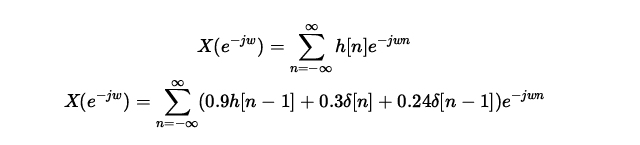

**4. Find the frequency response of the system using another method. Specifically, take the DTFT of the left-hand-side and right-hand-side of the difference equation, and then use linearity and the time-shifting property of the DTFT along with the fact that $H(\omega)=\frac{Y(\omega)}{X(\omega)}$**

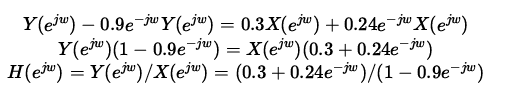

**5. Write Python code to compute and plot the magnitude and phase responses, $|H(\omega)|$ and $\angle H(\omega)$, for $-\pi<\omega<\pi$.**

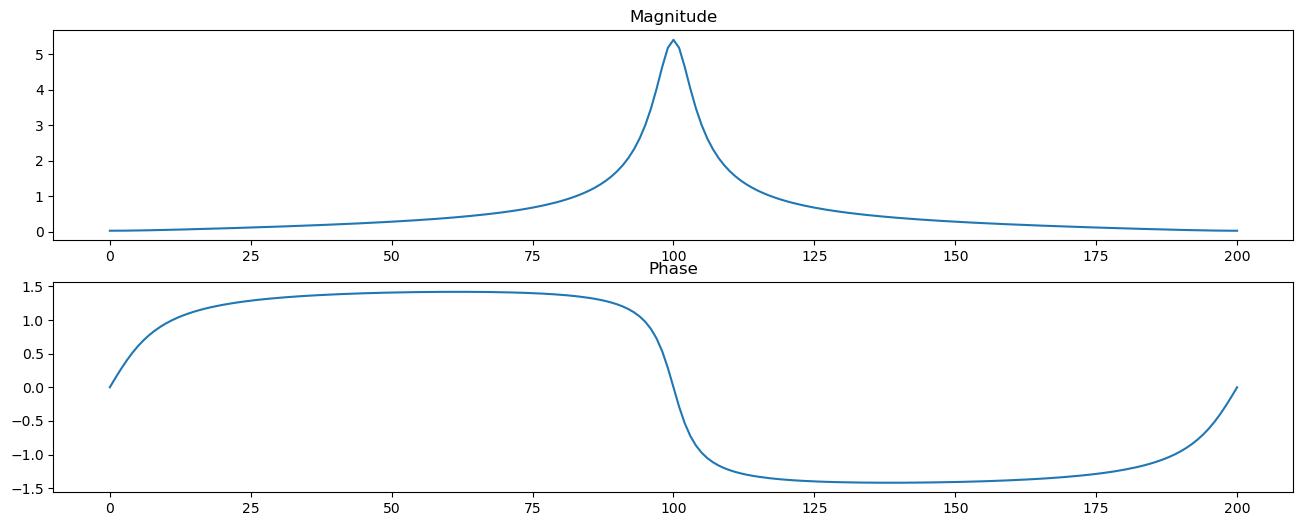

In [19]:
# write your code here
a = np.linspace(-np.pi, np.pi, 201)
h = (0.3 + 0.24 * np.exp(-1j * a)) / (1 - 0.9 * np.exp(-1j * a))
m = np.abs(h)
ang = np.angle(h)
figure, axis = plt.subplots(2, 1)

axis[0].plot(m)
axis[0].set_title("Magnitude")

axis[1].plot(ang)
axis[1].set_title("Phase")
plt.show()

<h3 style="color:red;"><left>Exercise 5.3</left></h3>

**1. Insert the printout of your completed block diagram.**

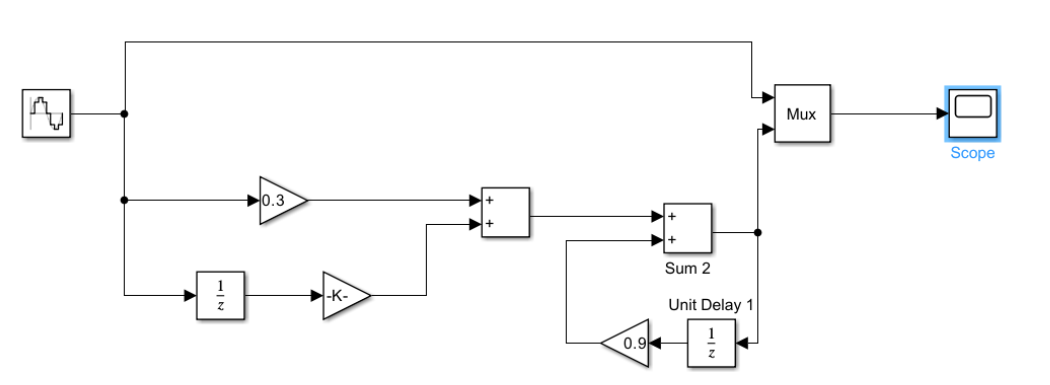

**2. Enter both the amplitude measurements you made and their theoretical values.**

| $\omega$ | Measurements | Theoretical Values |
|:--------:|:------------:|:------------------:|
| $\pi/16$ |     2.586         |         2.542           |
|  $\pi/8$ |     1.370         |         1.382           |
|  $\pi/4$ |     0.663         |         0.827           |

**3. Plot the impulse response, and the magnitude and phase of the frequency response by using your DTFT function.**

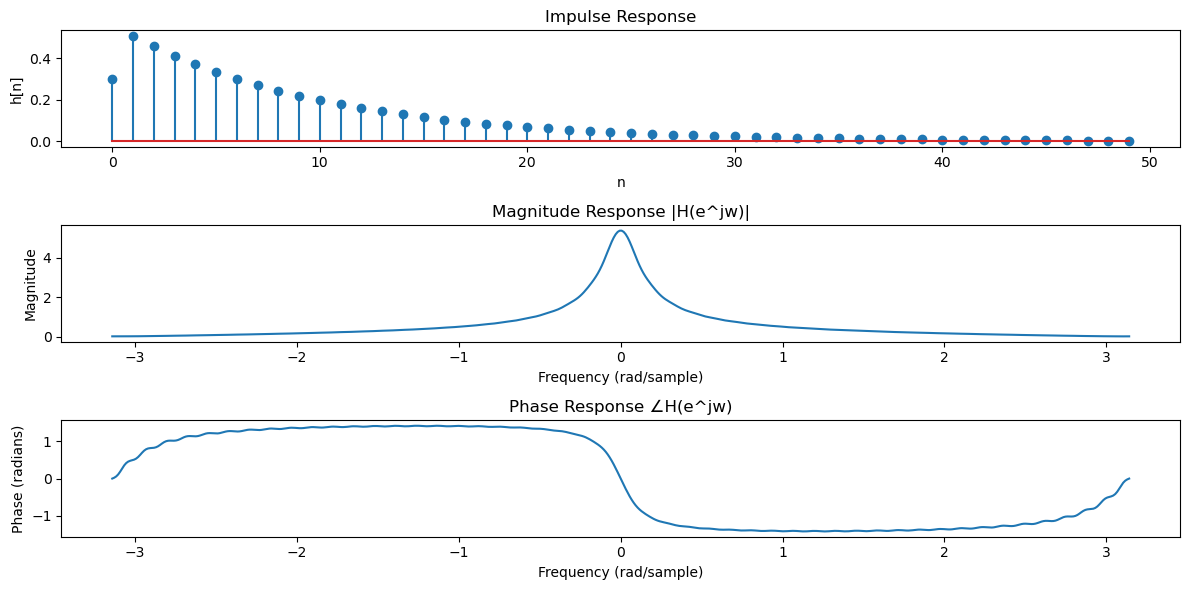

In [20]:
# write your code here

# Define the system difference equation to get impulse response
def impulse_response(N):
    h = np.zeros(N)
    # Initial conditions assuming y[n-1] = 0 for causality
    h[0] = 0.3  # response to delta[n]
    h[1] = 0.24 + 0.9 * h[0]  # recursive response
    for n in range(2, N):
        h[n] = 0.9 * h[n-1]
    return h

# Number of points for impulse response
N = 50
h = impulse_response(N)

# Define the frequency range
w = np.linspace(-np.pi, np.pi, 512)

# Calculate DTFT of impulse response over frequency range
H = np.array([DTFT(h, 0, w_i) for w_i in w])

# Get magnitude and phase
magnitude = np.abs(H)
phase = np.angle(H)

# Plot impulse response
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.stem(h)
plt.title("Impulse Response")
plt.xlabel("n")
plt.ylabel("h[n]")

# Plot magnitude response
plt.subplot(3, 1, 2)
plt.plot(w, magnitude)
plt.title("Magnitude Response |H(e^jw)|")
plt.xlabel("Frequency (rad/sample)")
plt.ylabel("Magnitude")

# Plot phase response
plt.subplot(3, 1, 3)
plt.plot(w, phase)
plt.title("Phase Response ∠H(e^jw)")
plt.xlabel("Frequency (rad/sample)")
plt.ylabel("Phase (radians)")

plt.tight_layout()
plt.show()
